In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("/content/house_price_data_200_rows.xlsx")
df.head(30)

,Area_sqft,Bedrooms,Bathrooms,Floors,Age,Location_Rating,Parking,Price_Lakhs
0,1188,4,3,3,16,1,1,89
1,2098,4,4,2,12,5,0,187
2,1677,4,4,2,22,3,1,127
3,1940,5,3,2,14,5,0,186
4,836,4,3,1,10,4,0,93
5,1534,2,2,3,0,5,0,154
6,1025,5,4,1,14,1,1,92
7,2015,4,1,3,11,5,0,179
8,963,5,2,1,2,4,1,128
9,662,2,3,1,2,2,0,58


In [4]:
df.isnull().sum()

,0
Area_sqft,0
Bedrooms,0
Bathrooms,0
Floors,0
Age,0
Location_Rating,0
Parking,0
Price_Lakhs,0


<Axes: >

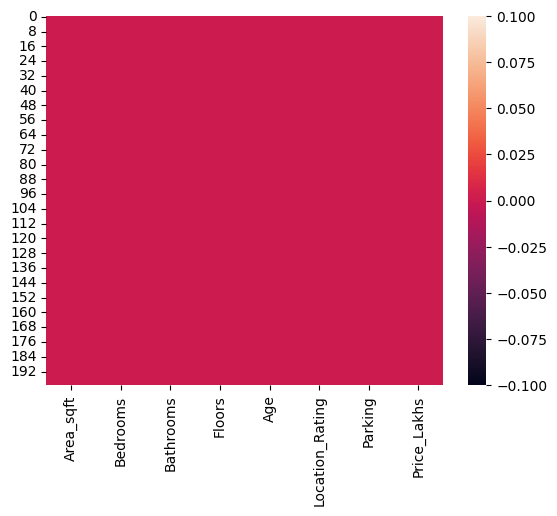

In [5]:
sns.heatmap(df.isnull())

/tmp/ipython-input-3286393789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathrooms'])


<Axes: xlabel='Bathrooms', ylabel='Density'>

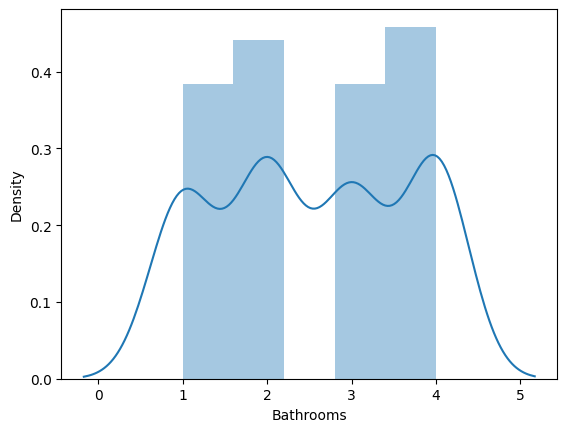

In [6]:
sns.distplot(df['Bathrooms'])

/tmp/ipython-input-1345312943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedrooms'])


<Axes: xlabel='Bedrooms', ylabel='Density'>

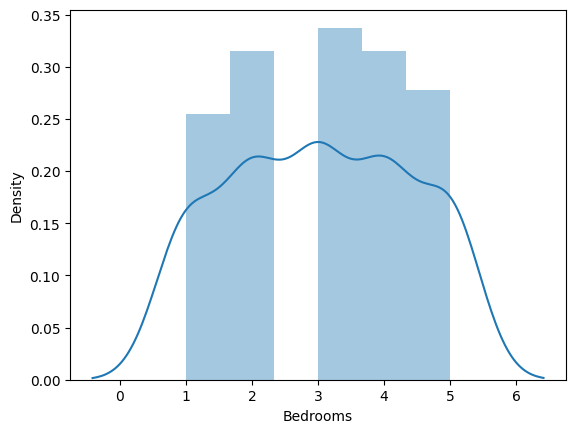

In [7]:
sns.distplot(df['Bedrooms'])

/tmp/ipython-input-2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

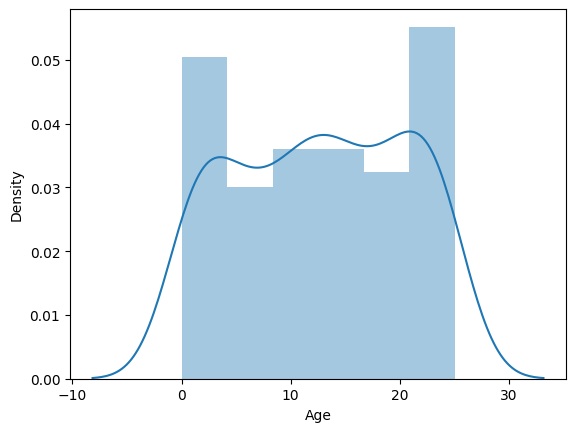

In [8]:
sns.distplot(df["Age"])

In [9]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
df=df[df<max]

/tmp/ipython-input-1330266370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Floors"])


<Axes: xlabel='Floors', ylabel='Density'>

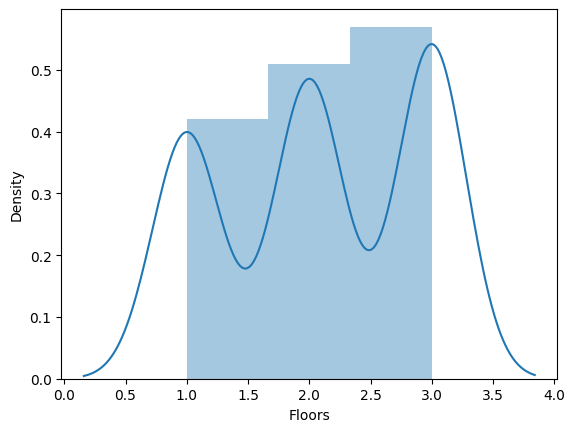

In [10]:
sns.distplot(df["Floors"])

/tmp/ipython-input-3158004414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Area_sqft"])


<Axes: xlabel='Area_sqft', ylabel='Density'>

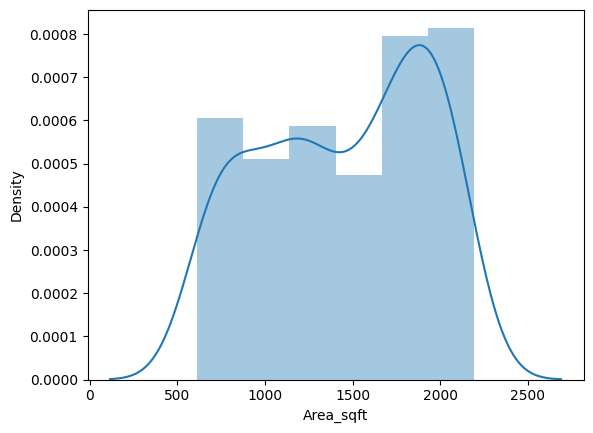

In [11]:
sns.distplot(df["Area_sqft"])

In [12]:
x=df.iloc[ : , : -1]
y=df["Price_Lakhs"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.score(x_test,y_test)*100

96.490085729276

In [15]:
price=lr.predict([[2098,4,4,2,12,5,0	]])
print(price,"lakhs")

[182.89174613] lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
